In [1]:
%matplotlib inline

import numpy as np
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale

In [2]:
data = pd.read_csv('cell_data.csv')

In [3]:
data.head()

line_name  specimen__id                         specimen__name  \
0   Scnn1a-Tg2-Cre     313862022    Scnn1a-Tg2-Cre;Ai14-167081.03.02.01   
1   Rorb-IRES2-Cre     479508018  Rorb-IRES2-Cre-D;Ai14-196662.03.01.01   
2  Htr3a-Cre_NO152     442627661   Htr3a-Cre_NO152;Ai14-178904.06.01.01   
3     Cux2-CreERT2     487358945      Cux2-CreERT2;Ai14-214155.05.01.01   
4   Scnn1a-Tg3-Cre     469803127    Scnn1a-Tg3-Cre;Ai14-180215.05.02.01   

  specimen__hemisphere  structure__id               structure__name  \
0                right            721  Primary visual area, layer 4   
1                 left            721  Primary visual area, layer 4   
2                 left      312782566       Anterior area, layer 6a   
3                 left            778  Primary visual area, layer 5   
4                right            778  Primary visual area, layer 5   

  structure__acronym  structure_parent__id structure_parent__acronym  \
0              VISp4                   385                      VISp   
1              VISp4                   385                      VISp   
2             VISa6a             312782546                      VISa   
3              VISp5                   385                      VISp   
4              VISp5                   385                      VISp   

  structure__layer ...    cell_reporter_status  m__glif  \
0                4 ...   cre reporter positive        0   
1                4 ...   cre reporter positive        2   
2               6a ...   cre reporter positive        0   
3                5 ...   cre reporter positive        5   
4                5 ...   cre reporter positive        5   

   m__biophys_perisomatic  m__biophys_all_active  tag__apical  \
0                       1                      0       intact   
1                       0                      0       intact   
2                       0                      0          NaN   
3                       0                      0       intact   
4                       0                      0       intact   

   tag__dendrite_type                            morph_thumb_path  \
0               spiny  /api/v2/well_known_file_download/487659609   
1               spiny                                         NaN   
2              aspiny                                         NaN   
3               spiny                                         NaN   
4               spiny                                         NaN   

                             ephys_thumb_path  \
0  /api/v2/well_known_file_download/487623088   
1  /api/v2/well_known_file_download/491384619   
2  /api/v2/well_known_file_download/487610447   
3  /api/v2/well_known_file_download/487361512   
4  /api/v2/well_known_file_download/487635954   

                 ephys_inst_thresh_thumb_path   id  
0  /api/v2/well_known_file_download/491376069  606  
1  /api/v2/well_known_file_download/491384621  522  
2  /api/v2/well_known_file_download/491377923   81  
3  /api/v2/well_known_file_download/491767690   38  
4  /api/v2/well_known_file_download/491376335  671  

[5 rows x 44 columns]

In [13]:
data_sub = data.iloc[:,17:27]

In [23]:
data_sub.head()

ef__upstroke_downstroke_ratio_long_square  ef__adaptation  \
0                                   5.261166        0.288858   
1                                   4.957590        0.097034   
2                                   4.843871        0.026744   
3                                   4.815331             NaN   
4                                   4.756384        0.022992   

   ef__f_i_curve_slope  ef__threshold_i_long_square    ef__tau  ef__avg_isi  \
0             0.159756                        190.0  17.653078   147.790000   
1             0.042555                        130.0  21.290832   106.357500   
2             0.122172                        230.0   6.668957   112.607500   
3             0.006781                        130.0  22.450481   140.730000   
4             0.245112                         50.0  28.245981    57.503437   

   ef__avg_firing_rate      ef__ri  ef__peak_t_ramp  ef__vrest  
0             6.766358   58.281287         2.552270 -63.574978  
1             9.402252  189.375005         2.475857 -72.237417  
2             8.880403  106.250000        12.004272 -78.260158  
3             7.105805  151.562640         2.939443 -77.838111  
4            17.390265  199.375002         2.150840 -76.375813

In [66]:
data_sub.iloc[:,0]

0      5.261166
1      4.957590
2      4.843871
3      4.815331
4      4.756384
5      4.709336
6      4.697517
7      4.586706
8      4.575732
9      4.522857
10     4.513263
11     4.504294
12     4.489141
13     4.427253
14     4.421134
15     4.412697
16     4.405622
17     4.401047
18     4.382054
19     4.353247
20     4.297568
21     4.290042
22     4.280574
23     4.238694
24     4.217188
25     4.214050
26     4.208485
27     4.198303
28     4.195806
29     4.164173
         ...   
662    1.123194
663    1.121180
664    1.120912
665    1.120508
666    1.116014
667    1.113791
668    1.111427
669    1.109592
670    1.096136
671    1.094022
672    1.089880
673    1.087265
674    1.081147
675    1.078711
676    1.078630
677    1.073883
678    1.073178
679    1.067104
680    1.049267
681    1.024258
682    1.012179
683    1.008697
684    1.008617
685    1.000824
686    0.996844
687    0.986617
688    0.960086
689    0.935694
690    0.887257
691    0.862726
Name: ef__upstroke_downs

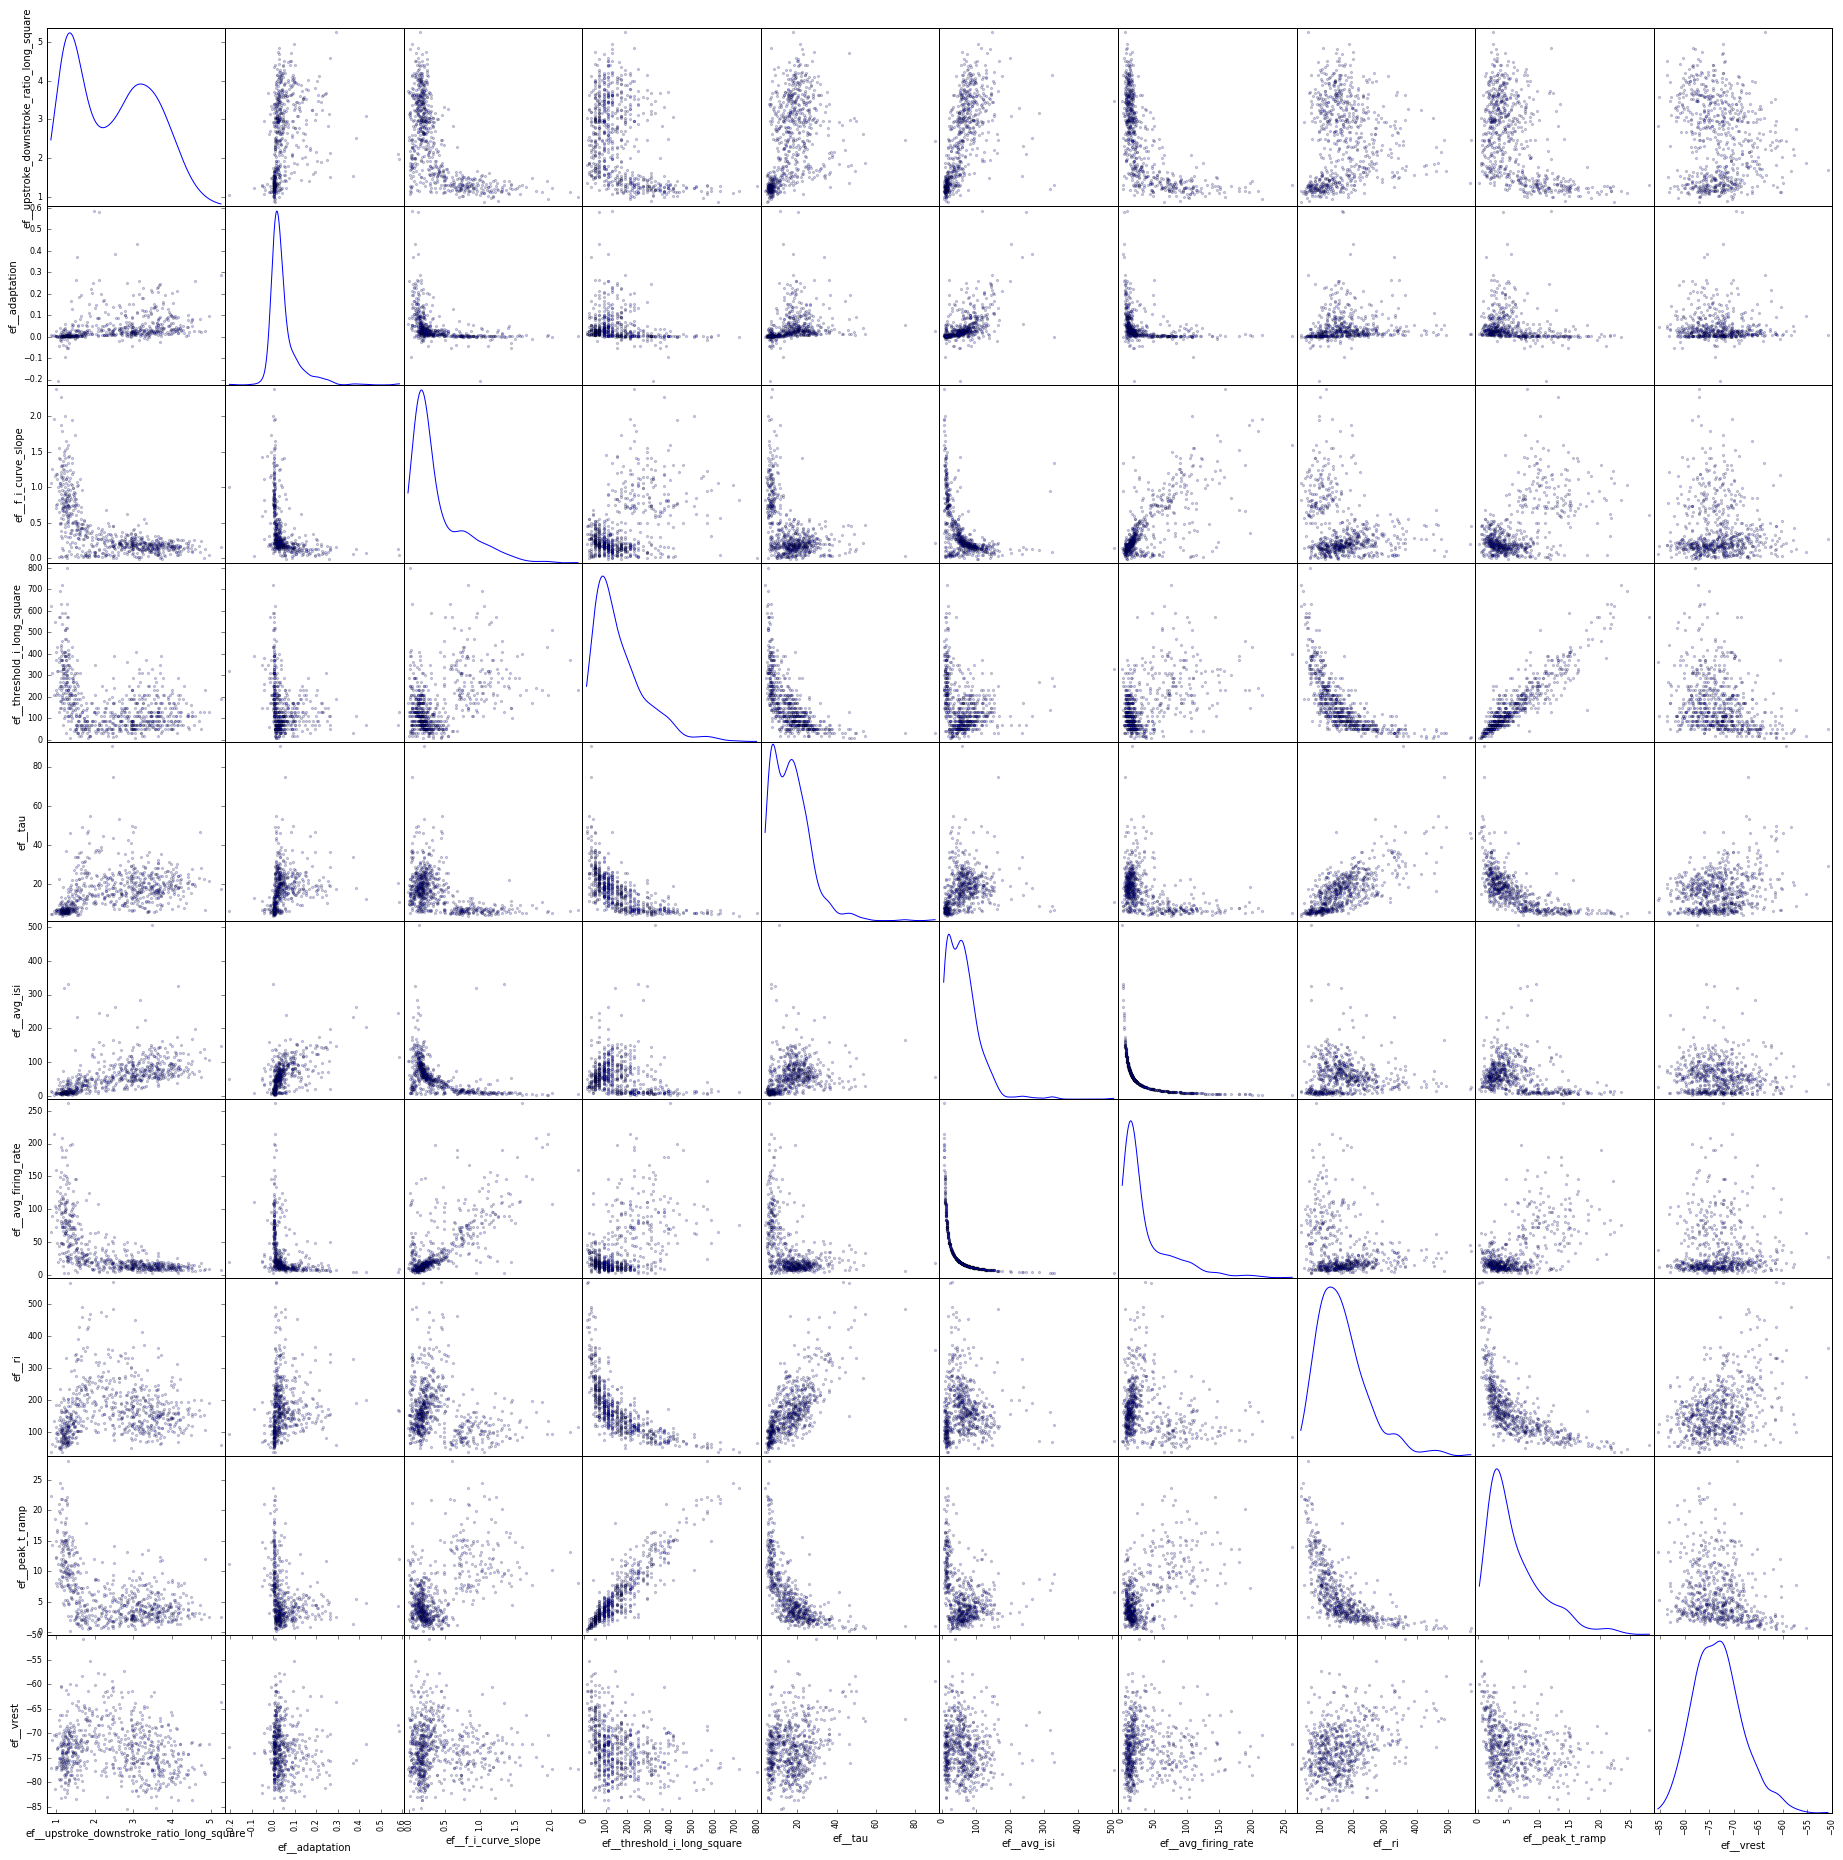

In [14]:
scatter = pd.tools.plotting.scatter_matrix(data_sub, alpha=0.2, figsize = (32,32), diagonal = 'kde')

In [114]:
data_sub_wona = data_sub.fillna(0)

In [115]:
sub_np = data_sub_wona.values

In [116]:
sub_np = scale(sub_np)

In [125]:
pca = PCA(n_components = 10)

In [126]:
pca.fit(sub_np)

PCA(copy=True, n_components=10, whiten=False)

In [127]:
var= pca.explained_variance_ratio_

In [128]:
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

In [129]:
print var1

[ 43.55  63.35  72.31  79.8   85.31  89.97  93.64  96.22  98.35 100.  ]


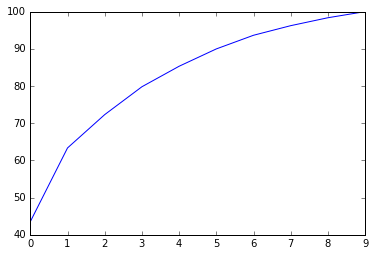

In [130]:
plt.plot(var1)

In [132]:
np_pca=pca.fit_transform(sub_np)

In [134]:
print np_pca

[[-2.65739487  2.49131317  2.8239468  ...,  1.12563382 -1.10714488
   0.25388687]
 [-2.4302111   1.2628769   0.03105542 ...,  0.46871056 -0.17607769
   0.68140952]
 [-0.06973079  2.92074714 -0.79046048 ...,  0.55898871  0.90931747
   0.79881732]
 ..., 
 [ 3.9487912  -3.22660094  1.79738095 ..., -0.09277069 -1.02953819
   0.01354889]
 [ 4.06066552 -0.50657717  0.77076999 ...,  0.55394201  0.05135554
  -0.39354578]
 [ 5.48004943  1.41540556  0.60145932 ...,  0.09332984 -0.29928062
   0.41072618]]


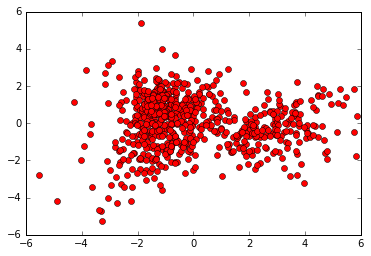

In [140]:
plt.plot(np_pca[:,0], np_pca[:,1], 'ro')